# MIS373 - AI For Business - Assignment 2

## Task 2: Weather Phenomenon Recognition

**Student Name:** _Andrew Nguyen_

**Student ID:** _222448995_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

Working as a consultant for Deep AI, I was tasked with developing an artificial intelligence solution to address the business needs of a weather monitoring agency. The objective was to leverage our expertise in Python and deep learning techniques to build and evaluate models for recognizing different weather phenomena from images.

In Section 2 - Data Preprocessing, I conducted exploratory data analysis and visualized sample images from the dataset containing 2,726 real-world images of five weather conditions: fogsmog, rain, rime, sandstorm, and snow. Necessary data preprocessing steps were taken to prepare the dataset for modeling.

In the AI Model Development Section 3, I implemented and compared the performance of various ANN deep learning models with different architectures, such as varying numbers of convolutional layers, kernels, and nodes. The model that achieved the highest accuracy and kappa metrics in classifying the weather images will be presented and discussed in detail.

Section 4, the Experiment Report, summarizes the results of the experiments conducted with different model architectures. A table is provided to compare the performance metrics, such as accuracy, precision, recall, and F1-score, across the models. The model with the best overall performance is identified, and its strengths and limitations are critically evaluated. Additionally, I discuss potential approaches, including data augmentation, transfer learning, or architectural modifications, that could further improve the performance of the weather phenomenon recognition models for real-world deployment. Through this project, I demonstrate the application of deep learning techniques to address a practical business problem in the domain of weather monitoring, showcasing our ability to develop accurate and robust models for image classification tasks.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In the Data Preprocessing stage, I performed several steps to prepare the weather image dataset for modeling. First, I imported the necessary libraries and modules, including TensorFlow, NumPy, Matplotlib, and others. I also set random seeds for reproducibility across TensorFlow, NumPy, and Python's random module.

Next, I mounted my Google Drive to access the dataset stored in the "Colab Notebooks/dataset/" folder. The dataset consists of five subfolders, each containing images of a different weather phenomenon: fogsmog, rain, rime, sandstorm, and snow. I printed the total number of files in each subfolder to get an overview of the dataset size.

To load the images, I defined a function load_images() that iterates through each subfolder and reads the image files using TensorFlow's tf.io.read_file and tf.image.decode_jpeg functions. Each image is resized to 100x100 pixels using tf.image.resize. The function assigns a label (e.g., 'Fogsmog Weather', 'Rain Weather') to each image and appends the image data and label to a list.

After loading all the images, I defined another function prepare_data(data) to preprocess the data. This function performs the following steps:

1. Shuffle the image data randomly.
2. Split the data into training and testing sets with a 70:30 ratio.
3. Convert the image data and labels into NumPy arrays.
4. Convert the image data from integers to 32-bit floating-point numbers.
5. Normalize the pixel values of the image data to the range [0, 1] by dividing by 255.
6. Create a mapping from category strings to integers (e.g., 'Fogsmog Weather' -> 0, 'Rain Weather' -> 1, etc.).
7. Encode the category labels using the mapping.

Finally, I defined a function display_images(X_train, Y_train, labels) to visualize a sample of 25 images from the training set along with their corresponding labels.

By the end of the Data Preprocessing stage, I had the training and testing data ready in the form of NumPy arrays (X_train, Y_train, X_test, Y_test), along with the categories array and the mapping between category strings and integers. These preprocessed data are now suitable for input into the deep learning models in the next stage.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import math

tf.random.set_seed(42)  # Set a seed value for TensorFlow
np.random.seed(42)  # Set a seed value for NumPy
random.seed(42)  # Set a seed value for Python's random module

import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.config.list_physical_devices('GPU')
from google.colab import drive

In [ ]:
#it will open a webpage for verifying your google account. if it is successful, the Google colab can link the Google drive
drive.mount('/content/drive')
# to show the folders under the dataset
!ls "/content/drive/My Drive/Colab Notebooks/dataset/"

Mounted at /content/drive
fogsmog  rain  rime  sandstorm	snow


In [ ]:
# Set the paths to the folders containing the image files
fogsmog_weather = '/content/drive/MyDrive/Colab Notebooks/dataset/fogsmog'
rain_weather = '/content/drive/MyDrive/Colab Notebooks/dataset/rain'
rime_weather = '/content/drive/MyDrive/Colab Notebooks/dataset/rime'
sandstorm_weather = '/content/drive/MyDrive/Colab Notebooks/dataset/sandstorm'
snow_weather = '/content/drive/MyDrive/Colab Notebooks/dataset/snow'

# get a list of all files in the folder
fogsmog_file_list = os.listdir(fogsmog_weather)
rain_file_list = os.listdir(rain_weather)
rime_file_list = os.listdir(rime_weather)
sandstorm_file_list = os.listdir(sandstorm_weather)
snow_file_list = os.listdir(snow_weather)

# print the total number of files
print(f'Total number of files under fogsmog folder are: {len(fogsmog_file_list)}')
print(f'Total number of files under rain folder are: {len(rain_file_list)}')
print(f'Total number of files under rime folder are: {len(rime_file_list)}')
print(f'Total number of files under sandstorm folder are: {len(sandstorm_file_list)}')
print(f'Total number of files under snow folder are: {len(snow_file_list)}')

Total number of files under fogsmog folder are: 550
Total number of files under rain folder are: 526
Total number of files under rime folder are: 550
Total number of files under sandstorm folder are: 550
Total number of files under snow folder are: 550


In [ ]:
def load_images():
    # Create a list to store the image data and labels
    data = []

    # Iterate through the files in the fogsmog folder
    for file in os.listdir(fogsmog_weather):
        # Check if the file is a jpeg or jpg file
        if file.endswith('.jpeg') or file.endswith('.jpg'):
            # Load the image data from the file using TensorFlow
            img = tf.io.read_file(os.path.join(fogsmog_weather, file))
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, (100, 100))
            # Assign a label to the file
            label = 'Fogsmog Weather'
            # Add the image data and label to the data list
            data.append((img, label))
    # Iterate through the files in the rain folder
    for file in os.listdir(rain_weather):
      # Check if the file is a jpeg or jpg file
      if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(rain_weather, file))
        img = tf.image.decode_jpeg(img,channels=3)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Rain Weather'
        # Add the image data and label to the data list
        data.append((img, label))

    # Iterate through the files in the rime folder
    for file in os.listdir(rime_weather):
      # Check if the file is a jpeg or jpg file
      if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(rime_weather, file))
        img = tf.image.decode_jpeg(img,channels=3)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Rime Weather'
        # Add the image data and label to the data list
        data.append((img, label))

    # Iterate through the files in the sandstorm folder
    for file in os.listdir(sandstorm_weather):
      # Check if the file is a jpeg or jpg file
      if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(sandstorm_weather, file))
        img = tf.image.decode_jpeg(img,channels=3)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Sandstorm Weather'
        # Add the image data and label to the data list
        data.append((img, label))

    # Iterate through the files in the snow folder
    for file in os.listdir(snow_weather):
      # Check if the file is a jpeg or jpg file
      if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(snow_weather, file))
        img = tf.image.decode_jpeg(img,channels=3)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Snow Weather'
        # Add the image data and label to the data list
        data.append((img, label))

    return data
data = load_images()

In [ ]:
def prepare_data(data):
    # Shuffle the data and split into train/test sets
    random.shuffle(data)
    train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

    # Extract the image data and labels from the training data
    X_train, Y_train = zip(*train_data)

    # Extract the image data and labels from the testing data
    X_test, Y_test = zip(*test_data)

    # Convert the image data and labels into NumPy arrays
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)

    # change integers to 32-bit floating point numbers
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # normalize each value for each pixel for the entire vector for each input
    X_train /= 255
    X_test /= 255

    # Create a NumPy array with category strings
    categories = np.array(['Fogsmog Weather', 'Rain Weather', 'Rime Weather', 'Sandstorm Weather', 'Snow Weather'])

    # Create a mapping from category strings to integers
    category_map = {'Fogsmog Weather': 0, 'Rain Weather': 1, 'Rime Weather': 2, 'Sandstorm Weather': 3, 'Snow Weather': 4}

    # Encode the categories
    Y_train = np.array([category_map[category] for category in Y_train])
    Y_test = np.array([category_map[category] for category in Y_test])

    return X_train, Y_train, X_test, Y_test, categories

In [ ]:
X_train, Y_train, X_test, Y_test, categories = prepare_data(data)

In [ ]:
def display_images(X_train, Y_train, labels):
    plt.rcParams['figure.figsize'] = (9, 9)

    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(X_train[i], interpolation='none')
        plt.title("{}".format(labels[int(Y_train[i])]))
        plt.tight_layout()

<ipython-input-7-2247be3f3704>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i+1)


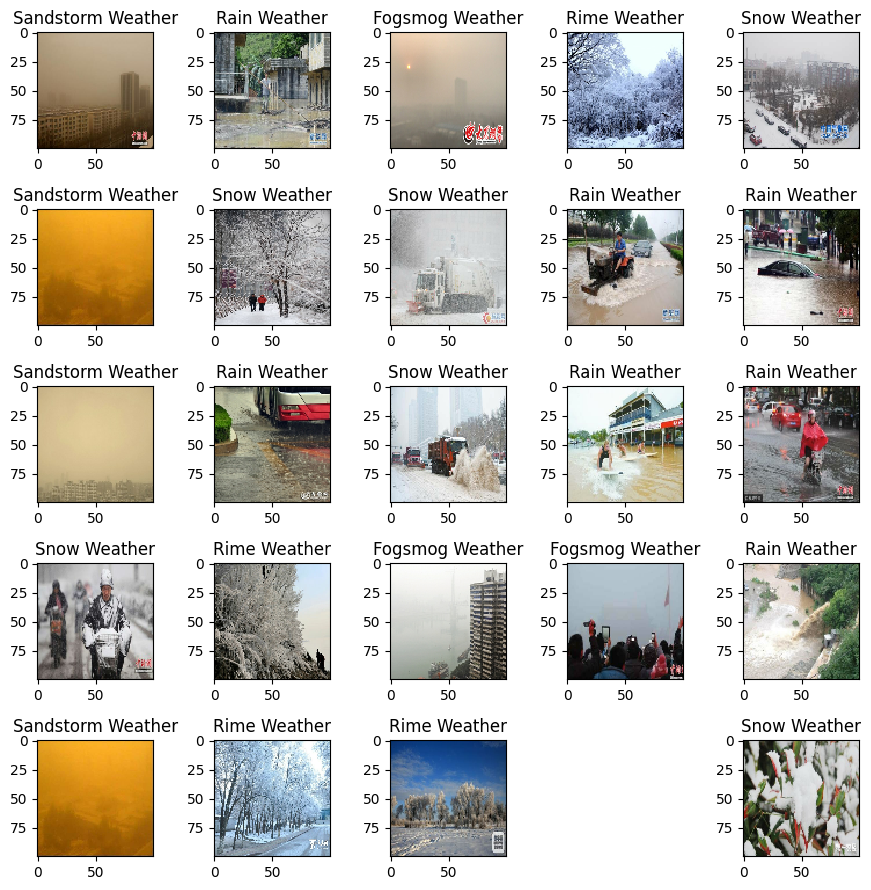

In [ ]:
display_images(X_train, Y_train, categories)

### Figure 1: Dataset samples

<a id = "cell_model"></a>
## 3. AI Model Development

In this section, I implemented and trained various deep learning models to classify the weather images into five categories: fogsmog, rain, rime, sandstorm, and snow. First, I one-hot encoded the labels (Y_train and Y_test) using TensorFlow's to_categorical function to prepare them for multi-class classification.Then, among 5 different models I have trained, I used this one to complete this project as is shows highest performance compared to others. The model I used consists of the following layers:

- A 2D Convolutional layer with 32 filters of size (3, 3) and ReLU activation, taking input images of shape (100, 100, 3) (RGB images of size 100x100 pixels).
- A 2D Max Pooling layer with a pool size of (2, 2).
- A Dropout layer with a rate of 0.3 to reduce overfitting.
- Another 2D Convolutional layer with 64 filters of size (3, 3) and ReLU activation.
- Another 2D Max Pooling layer with a pool size of (2, 2).
- Another Dropout layer with a rate of 0.3.
- A Flatten layer to convert the 2D feature maps into a 1D vector.
- A Dense layer with 256 nodes, ReLU activation, and L2 regularization (with a regularization factor of 0.01) to introduce sparsity and prevent overfitting.
- A Dropout layer with a rate of 0.6.
- A Dense output layer with 5 nodes (one for each class) and a softmax activation function.

The model was compiled with categorical cross-entropy loss, Adam optimizer with a learning rate of 0.0001, and accuracy as the evaluation metric.

I then trained the model using the model.fit() function, passing in the training data (X_train, Y_train) and validation data (X_test, Y_test). The model was trained for 500 epochs with a batch size of 32, and early stopping was implemented using the EarlyStopping callback to prevent overfitting and stop training when the validation loss stopped improving for 20 epochs.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from keras.optimizers import Adam

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=5)
Y_test = to_categorical(Y_test, num_classes=5)

In [ ]:
num_classes = 5
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

In [ ]:
def best_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Increased dropout
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Increased dropout
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Added L2 regularization
    model.add(Dropout(0.6))  # Increased dropout
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.0001),
                  metrics='accuracy')
    return model

In [ ]:
model = best_model()

In [ ]:
hist = model.fit(X_train, Y_train,
      batch_size=32,
      epochs=500,
      shuffle=True,
      verbose=2,
      validation_data=(X_test, Y_test),
      callbacks=keras_callbacks)

Epoch 1/500
60/60 - 8s - loss: 5.8804 - accuracy: 0.3029 - val_loss: 4.9541 - val_accuracy: 0.4303 - 8s/epoch - 137ms/step
Epoch 2/500
60/60 - 1s - loss: 4.2981 - accuracy: 0.4303 - val_loss: 3.8423 - val_accuracy: 0.5232 - 1s/epoch - 19ms/step
Epoch 3/500
60/60 - 1s - loss: 3.3805 - accuracy: 0.5273 - val_loss: 3.1550 - val_accuracy: 0.5844 - 1s/epoch - 20ms/step
Epoch 4/500
60/60 - 1s - loss: 2.8295 - accuracy: 0.5508 - val_loss: 2.7212 - val_accuracy: 0.5660 - 1s/epoch - 23ms/step
Epoch 5/500
60/60 - 1s - loss: 2.4332 - accuracy: 0.5839 - val_loss: 2.3116 - val_accuracy: 0.6479 - 1s/epoch - 23ms/step
Epoch 6/500
60/60 - 1s - loss: 2.1634 - accuracy: 0.6090 - val_loss: 2.0825 - val_accuracy: 0.6699 - 1s/epoch - 21ms/step
Epoch 7/500
60/60 - 1s - loss: 1.9505 - accuracy: 0.6211 - val_loss: 1.8764 - val_accuracy: 0.6675 - 1s/epoch - 19ms/step
Epoch 8/500
60/60 - 1s - loss: 1.7490 - accuracy: 0.6509 - val_loss: 1.7258 - val_accuracy: 0.6944 - 1s/epoch - 19ms/step
Epoch 9/500
60/60 - 1s 

After training, I evaluated the model’s performance on the test set using various metrics:

1. Overfitting Check:
- Loss: The difference between the training and validation loss (0.464 and 0.713, respectively) is noticeable but acceptable, as shown in Figure 2.
- Accuracy: Similar to the loss metric, there’s a significant difference between the training and validation accuracy (approximately 0.90 and 0.79, respectively). Despite the limited dataset, the test accuracy is decent, nearly reaching 0.8 (see Figure 3).

=> As a result, I believe this model has performed well in reducing overfitting during training.
2. Model’s Performance: With both Accuracy and Kappa metrics greater than 0.7, the model can be considered decent in most cases, especially when dealing with a limited dataset.

3. Worst Performance Class Analysis: From the Classification Report (Table 1), the ‘Snow’ class stands out as the worst-performing class among the five, as evidenced by its lowest F1-score and Precision, approximately 0.69 and 0.64 respectively. It also has the second-lowest Recall (approximately 0.75), only higher than the ‘Rime’ class, which stands at 0.67. Despite the data not showing a significant imbalance (only the ‘Rain’ class has fewer images at 526, while all other classes have 550 images), the ‘Snow’ class still underperforms. This could be due to the inherent similarity between ‘Snow’ and ‘Rime’ weather conditions, which might be confusing the model. This is further supported by the Confusion Matrix (Figure 4), which shows that ‘Snow’ is often misclassified as ‘Rime’. Interestingly, the ‘Rime’ class also struggles, with the second-lowest F1-score, the lowest Recall, and a Precision just higher than the ‘Snow’ class and the ‘Rain’ class (which has fewer images than the others). This suggests that improving the model’s ability to distinguish between ‘Snow’ and ‘Rime’ could lead to a significant overall improvement in performance.

In [ ]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.4641
Train accuracy: 0.9036 

Test loss: 0.713
Test accuracy: 0.7861


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= ["Fogsmog","Rain","Rime","Sandstorm","Snow"])

# Print the report
print("The result of the classification report is: \n ",report)

26/26 [==============================] - 0s 4ms/step
The result of Kappa is : 0.733
The result of the classification report is: 
                precision    recall  f1-score   support

     Fogsmog       0.86      0.82      0.84       176
        Rain       0.77      0.83      0.80       162
        Rime       0.84      0.67      0.75       165
   Sandstorm       0.86      0.86      0.86       157
        Snow       0.64      0.75      0.69       158

    accuracy                           0.79       818
   macro avg       0.79      0.79      0.79       818
weighted avg       0.79      0.79      0.79       818



### Table 1: Classification Report

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

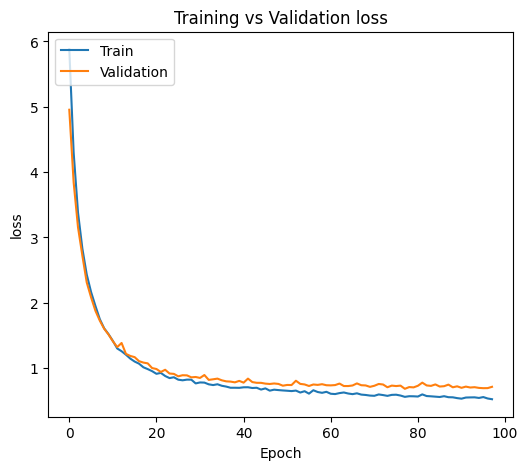

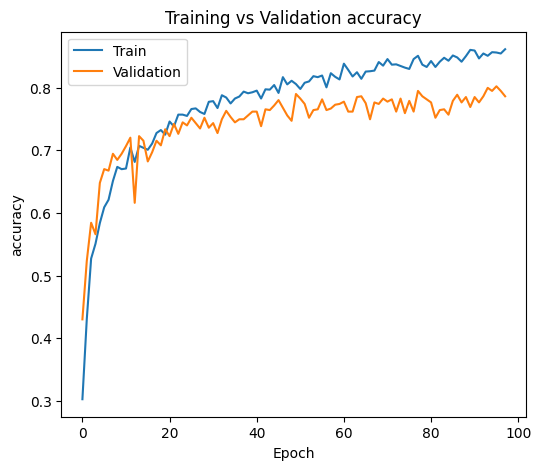

In [ ]:
plot_hist(pd.DataFrame(hist.history))

### Figure 2: Training vs Validation loss / Figure 3: Training vs Validation accuracy

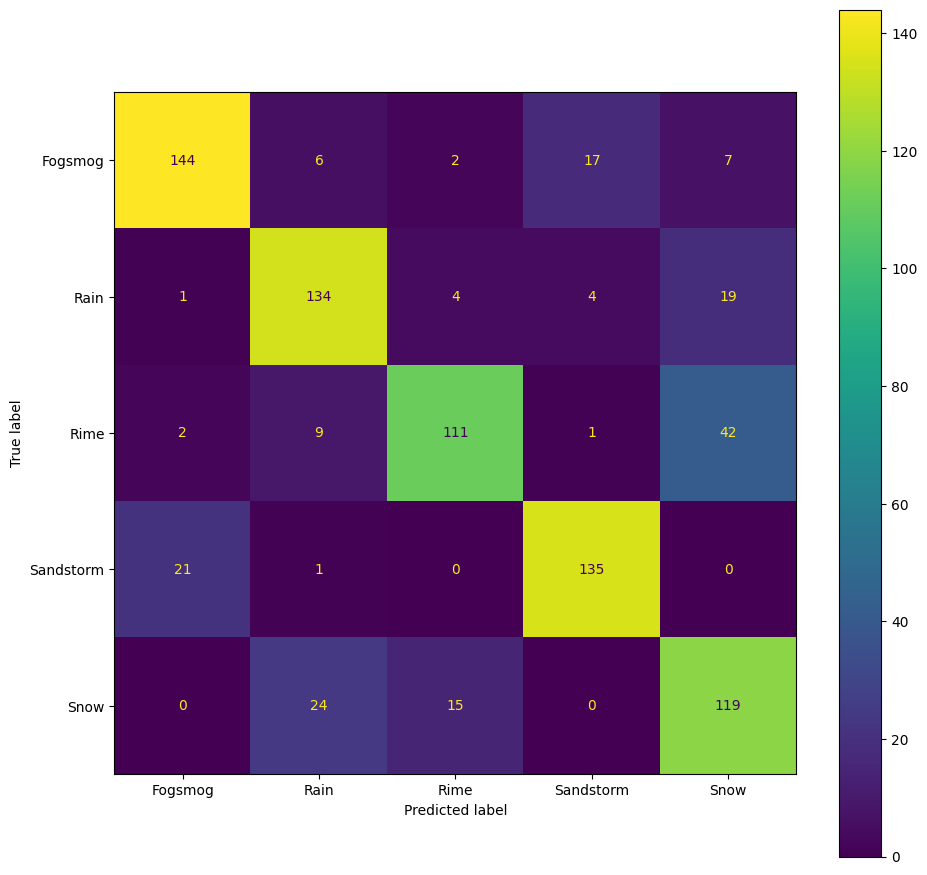

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Fogsmog","Rain","Rime","Sandstorm","Snow"])

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

### Figure 4: Confusion Matrix

In [ ]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

1/1 [==============================] - 0s 52ms/step


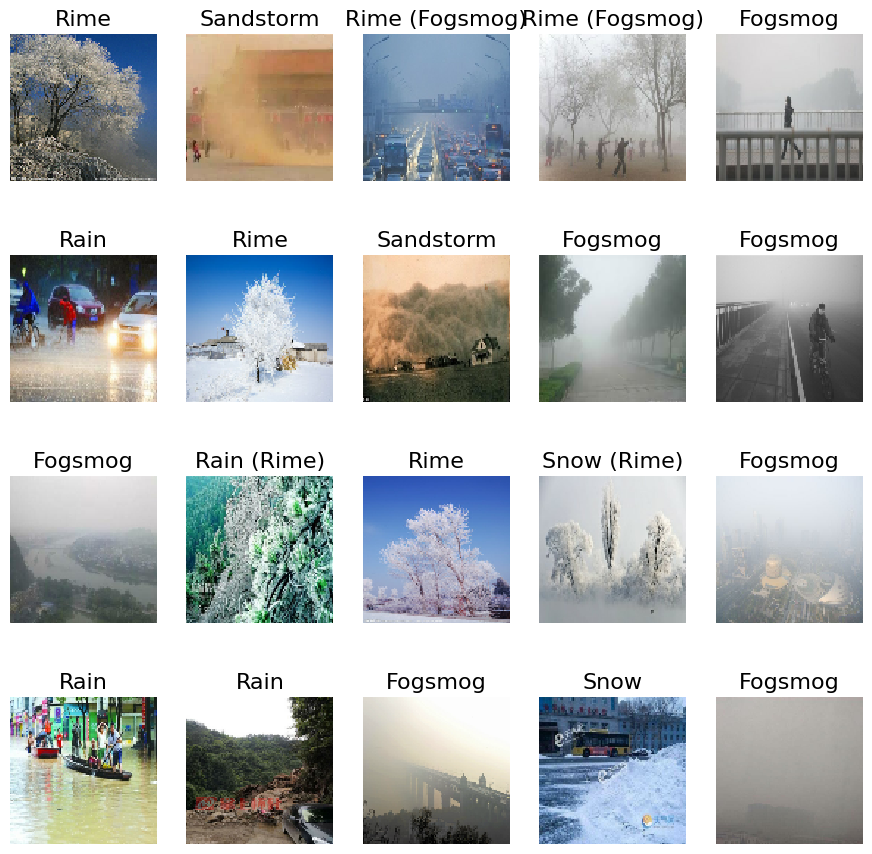

In [ ]:
class_names = ["Fogsmog","Rain","Rime","Sandstorm","Snow"]
img_range = range(20)
imgs = X_test[img_range]
img_rows, img_cols = 100, 100
channels = 3
true_labels = [class_names[np.argmax(x)] for x in Y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [class_names[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles)

<a id = "cell_report"></a>
## 4. Experiments Report

In this project, I have trained and compared 6 CNN different models with different architectures (Table 2), with the first Model collected from the Class, it shows a highly rate of overfitting when Test Loss and Train Loss are too different although I have applied Dropout() and EarlyStopping() (which are two common ways to reduce overfitting). Therefore, I applied two methods for the next 5 models to reduce overfitting are:
- Replace RMSprop optimizer with Adam (or AdamW)
- Using Regularization L2 to the model.
As a result, my next 5 models have a better performance compared to the first one. And from those 5 models, I chose the Model 3 which has highest Kappa (≈0.77) and Accuracy (≈0.82). However, as the model will train and test data randomly, the result when I train the model in section 3 is slightly different from the result in Table 1.

## Table 2: Performance Metrics between 6 Models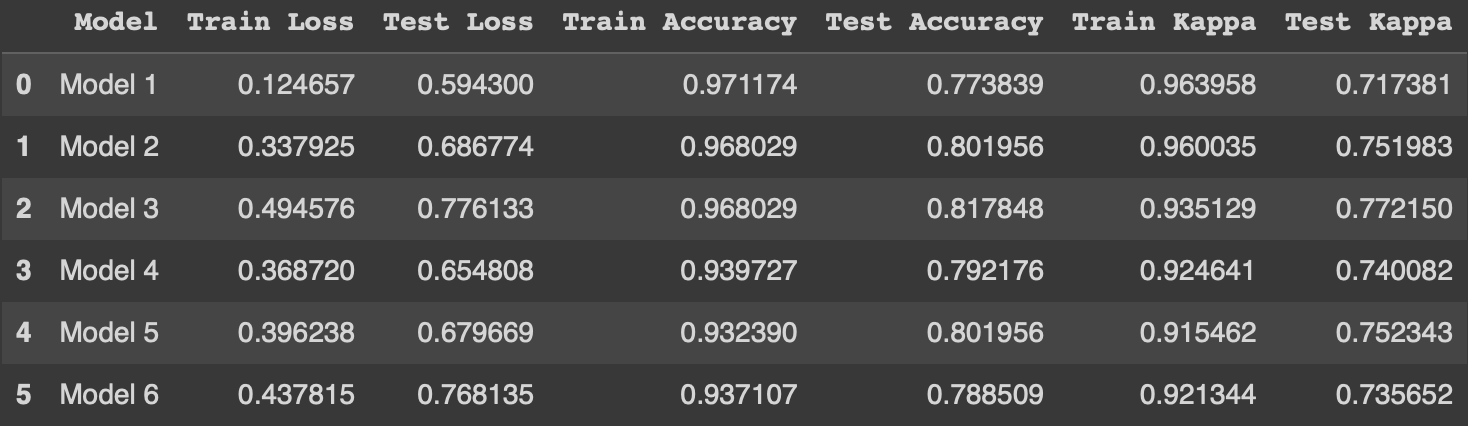

Below are simple explaination of 6 models:
Model 1:

This is a relatively simple CNN architecture with the following layers:

- A 2D convolutional layer with 32 filters of size (3, 3) and ReLU activation
- A 2D max-pooling layer with a pool size of (2, 2)
- A dropout layer with a rate of 0.25 to reduce overfitting
- A flatten layer to convert the 2D feature maps into a 1D vector
- A dense layer with 128 nodes and ReLU activation
- A dropout layer with a rate of 0.5
- An output dense layer with the number of classes (5) and softmax activation
- The model is compiled with categorical cross-entropy loss, Adam optimizer with a learning rate of 0.0001 and weight decay of 1e-6, and accuracy as the evaluation metric.


Model 2:

This is a deeper CNN architecture with the following layers:

- A 2D convolutional layer with 64 filters of size (3, 3) and ReLU activation.
- A 2D max-pooling layer with a pool size of (2, 2)
- A dropout layer with a rate of 0.5
- Another 2D convolutional layer with 128 filters of size (3, 3) and ReLU activation
- Another 2D max-pooling layer with a pool size of (2, 2)
- Another dropout layer with a rate of 0.5
- A flatten layer to convert the 2D feature maps into a 1D vector
- A dense layer with 512 nodes, ReLU activation, and L2 regularization with a factor of 0.01
- A dropout layer with a rate of 0.6
- An output dense layer with the number of classes (5) and softmax activation
- The model is compiled with categorical cross-entropy loss, Adam optimizer with a learning rate of 0.0001, and accuracy as the evaluation metric.


Model 3:

This is my chosen model for this task, refer to its architecture in Section 3 AI Model Development.


Model 4:

This is a CNN architecture with the following layers:

- A 2D convolutional layer with 64 filters of size (3, 3) and ReLU activation
- A 2D max-pooling layer with a pool size of (2, 2)
- A dropout layer with a rate of 0.4
- Another 2D convolutional layer with 32 filters of size (3, 3) and ReLU activation
- Another 2D max-pooling layer with a pool size of (2, 2)
- Another dropout layer with a rate of 0.4
- A flatten layer to convert the 2D feature maps into a 1D vector
- A dense layer with 128 nodes, ReLU activation, and L2 regularization with a factor of 0.01
- A dropout layer with a rate of 0.6
- An output dense layer with the number of classes (5) and softmax activation
- The model is compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.0001 and weight decay of 1e-6, and accuracy as the evaluation metric.


Model 5:

This is a CNN architecture with the following layers:

- A 2D convolutional layer with 32 filters of size (3, 3) and ReLU activation
- A 2D max-pooling layer with a pool size of (2, 2)
- A dropout layer with a rate of 0.3
- Another 2D convolutional layer with 64 filters of size (3, 3) and ReLU activation
- Another 2D max-pooling layer with a pool size of (2, 2)
- Another dropout layer with a rate of 0.3
- A flatten layer to convert the 2D feature maps into a 1D vector
- A dense layer with 256 nodes, ReLU activation, and L2 regularization with a factor of 0.01
- A dropout layer with a rate of 0.6
- An output dense layer with the number of classes (5) and softmax activation
- The model is compiled with categorical cross-entropy loss, Adam optimizer with a learning rate of 0.0001, and accuracy as the evaluation metric.

Model 6:

This is a CNN architecture with the following layers:
- A 2D convolutional layer with 32 filters of size (5, 5) and ReLU activation
- A 2D max-pooling layer and a dropout layer with a rate of 0.4.
- It then has another 2D convolutional layer with 64 filters of size (5, 5) and ReLU activation
- Another 2D max-pooling layer
- Another dropout layer with a rate of 0.4. After flattening the feature maps
- It has a dense layer with 256 nodes, ReLU activation, and L2 regularization with a factor of 0.01, followed by a dropout layer with a rate of 0.6.
- Finally, it has an output dense layer with the number of classes (5) and softmax activation.
- The model is compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.0001 and weight decay of 1e-6, and accuracy as the evaluation metric.

To be concluded, I believe Model 3 strikes a good balance between model complexity and regularization techniques. Its architecture, consisting of a single convolutional layer followed by a dense layer, is not too shallow nor too deep, which may help prevent underfitting or overfitting. The use of dropout layers (0.3 and 0.6 rates) and L2 regularization on the dense layer introduces appropriate regularization to improve generalization. Additionally, the AdamW optimizer, with its weight decay regularization, can further enhance the model's performance by inducing sparsity in the weights. The suitable hyperparameters, such as the learning rate and weight decay value, could also contribute to the model's effective convergence during training. Overall, this balanced approach of moderate complexity, well-chosen regularization methods, and appropriate hyperparameters may have allowed Model 3 to learn the relevant features from the weather images while avoiding overfitting, resulting in its potential superiority for the classification task.

# Reference:
TensorFlow. (n.d.). tf.keras.optimizers. TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/